In [1]:
import platform
print('Python: ' + platform.python_version())

import numpy as np
print('numpy: ' + np.__version__)

import pandas as pd
print('pandas: ' + pd.__version__)

import scipy
print('scipy: ' + scipy.__version__)

import sklearn
print('scikit-learn: ' + sklearn.__version__)

#import matplotlib as plt
#print('matplotlib: ' + plt.__version__)

import flask
print('flask: ' + flask.__version__)

import os
import matplotlib.pyplot as plt

Python: 3.6.1
numpy: 1.12.1
pandas: 0.20.1
scipy: 0.19.0
scikit-learn: 0.18.1
flask: 0.12.2


In [2]:
path_1st_roe_sst = '/media/jedrzej/0CB49462B4945056/01_Dokumenty/01_PUT/05_SU2-development/TestCases/sajben/SU2-1st-ROE-SST/v01'
path_2nd_jst_sst = '/media/jedrzej/0CB49462B4945056/01_Dokumenty/01_PUT/05_SU2-development/TestCases/sajben/SU2-2nd-JST-SST/v01'
path_1st_hllc_sst = '/media/jedrzej/0CB49462B4945056/01_Dokumenty/01_PUT/05_SU2-development/TestCases/sajben/SU2_1st_HLLC_SST/v01'

In [3]:
os.chdir(path_1st_roe_sst)
hist_first_roe_sst = pd.read_csv('history_sajben_1st_roe_sst.vtk', delimiter=",", decimal='.')
#hist_first_roe_sst = hist_first_roe_sst.set_index('Iteration')
hist_first_roe_sst

,Iteration,CLift,CDrag,CSideForce,CMx,CMy,CMz,CFx,CFy,CFz,...,Res_Flow[1],Res_Flow[2],Res_Flow[3],Res_Flow[4],Res_Turb[0],Res_Turb[1],MassFlowRate,Linear_Solver_Iterations,CFL_Number,Time(min)
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.839250,-5.404019,3.820313,0.0,-0.573274,5.138332,0.0,3.0,1.000000,0.003813
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.748351,-0.186663,3.725053,0.0,-0.586335,7.212289,0.0,3.0,1.251250,0.007521
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.670801,-0.279299,3.641666,0.0,-0.601484,7.202679,0.0,3.0,1.388892,0.011076
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.614244,-0.318260,3.580007,0.0,-0.612043,7.184745,0.0,3.0,1.532212,0.014633
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.571499,-0.320994,3.533813,0.0,-0.618724,7.160374,0.0,3.0,1.655971,0.018212
5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.536968,-0.305236,3.497144,0.0,-0.622940,7.129080,0.0,3.0,1.757179,0.021774
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.507751,-0.281337,3.466559,0.0,-0.626511,7.090779,0.0,3.0,1.836946,0.025322
7,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.482112,-0.254707,3.439948,0.0,-0.630667,7.045855,0.0,3.0,1.903365,0.028906
8,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.459209,-0.228207,3.416271,0.0,-0.636266,6.994871,0.0,3.0,1.961074,0.032459
9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.438517,-0.203176,3.394906,0.0,-0.643789,6.938521,0.0,3.0,2.012860,0.036016


In [4]:
os.chdir(path_2nd_jst_sst)
hist_second_jst_sst = pd.read_csv('history_sajben_2nd_jst_sst.vtk', delimiter=",", decimal='.')
#hist_second_jst_sst = hist_second_jst_sst.set_index('Iteration')
hist_second_jst_sst

,Iteration,CLift,CDrag,CSideForce,CMx,CMy,CMz,CFx,CFy,CFz,...,Res_Flow[1],Res_Flow[2],Res_Flow[3],Res_Flow[4],Res_Turb[0],Res_Turb[1],MassFlowRate,Linear_Solver_Iterations,CFL_Number,Time(min)
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.839250,-5.404019,3.820313,0.0,-0.572006,5.138351,0.0,3.0,1.000000,0.005188
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.798986,-0.765998,3.756665,0.0,-0.584506,7.213226,0.0,3.0,1.251250,0.010101
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.734021,-0.547897,3.689900,0.0,-0.599246,7.206031,0.0,3.0,1.342866,0.014840
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.677759,-0.395239,3.632526,0.0,-0.609247,7.190544,0.0,3.0,1.452396,0.019978
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.631172,-0.306264,3.587307,0.0,-0.615588,7.168392,0.0,3.0,1.559517,0.026619
5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.593988,-0.255100,3.553590,0.0,-0.619926,7.139399,0.0,3.0,1.650081,0.032866
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.564349,-0.223915,3.527383,0.0,-0.623153,7.103718,0.0,3.0,1.721730,0.037565
7,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.540268,-0.200197,3.505140,0.0,-0.626635,7.062007,0.0,3.0,1.777518,0.042248
8,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.520059,-0.177289,3.485064,0.0,-0.631642,7.014826,0.0,3.0,1.823025,0.046978
9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.502588,-0.153782,3.466811,0.0,-0.638384,6.961466,0.0,3.0,1.862682,0.051769


In [5]:
os.chdir(path_1st_hllc_sst)
hist_first_hllc_sst = pd.read_csv('history_sajben_1st_hllc_sst.vtk', delimiter=",", decimal='.')
#hist_first_hllc_sst = hist_first_hllc_sst.set_index('Iteration')
hist_first_hllc_sst

,Iteration,CLift,CDrag,CSideForce,CMx,CMy,CMz,CFx,CFy,CFz,...,Res_Flow[1],Res_Flow[2],Res_Flow[3],Res_Flow[4],Res_Turb[0],Res_Turb[1],MassFlowRate,Linear_Solver_Iterations,CFL_Number,Time(min)
0,0,0.221380,0.140950,0.0,0.0,0.0,0.013348,0.140950,0.221380,0.0,...,0.643469,-5.649780,3.521197,0.0,0.787935,5.837412,0.0,3.0,2.000000,0.004165
1,1,0.177937,0.141678,0.0,0.0,0.0,0.005829,0.141678,0.177937,0.0,...,0.587996,-0.004905,3.441812,0.0,0.727485,7.932236,0.0,2.0,1.251250,0.007937
2,2,0.140589,0.138742,0.0,0.0,0.0,-0.000306,0.138742,0.140589,0.0,...,0.557445,-0.127355,3.385466,0.0,0.696158,7.920068,0.0,2.0,1.398747,0.011696
3,3,0.112836,0.135902,0.0,0.0,0.0,-0.005114,0.135902,0.112836,0.0,...,0.532092,-0.232783,3.344863,0.0,0.717676,7.785886,0.0,2.0,1.492905,0.015396
4,4,0.091802,0.133056,0.0,0.0,0.0,-0.008871,0.133056,0.091802,0.0,...,0.509422,-0.268620,3.318891,0.0,0.704845,7.588721,0.0,2.0,1.566416,0.019035
5,5,0.075524,0.130184,0.0,0.0,0.0,-0.011801,0.130184,0.075524,0.0,...,0.488274,-0.283685,3.297944,0.0,0.659426,7.361043,0.0,2.0,1.619373,0.022983
6,6,0.062641,0.127287,0.0,0.0,0.0,-0.014089,0.127287,0.062641,0.0,...,0.468334,-0.290812,3.279225,0.0,0.602028,7.123134,0.0,2.0,1.664278,0.026633
7,7,0.052280,0.124380,0.0,0.0,0.0,-0.015877,0.124380,0.052280,0.0,...,0.449585,-0.293723,3.262168,0.0,0.545353,6.892231,0.0,2.0,1.705263,0.030298
8,8,0.043864,0.121486,0.0,0.0,0.0,-0.017269,0.121486,0.043864,0.0,...,0.432064,-0.293999,3.246607,0.0,0.493963,6.685273,0.0,2.0,1.743628,0.033984
9,9,0.036989,0.118628,0.0,0.0,0.0,-0.018346,0.118628,0.036989,0.0,...,0.415740,-0.292298,3.232389,0.0,0.447896,6.513283,0.0,2.0,1.779862,0.037701


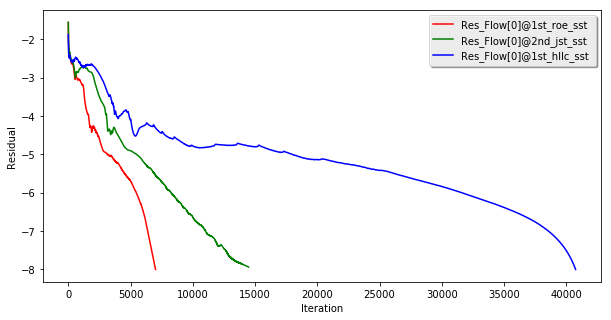

In [7]:
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(hist_first_roe_sst['Iteration'], hist_first_roe_sst['Res_Flow[0]'], 'r', label='Res_Flow[0]@1st_roe_sst')
ax.plot(hist_second_jst_sst['Iteration'], hist_second_jst_sst['Res_Flow[0]'], 'g', label='Res_Flow[0]@2nd_jst_sst')
ax.plot(hist_first_hllc_sst['Iteration'], hist_first_hllc_sst['Res_Flow[0]'], 'b', label='Res_Flow[0]@1st_hllc_sst ')
legend = ax.legend(loc='upper right', shadow=True)
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.show()

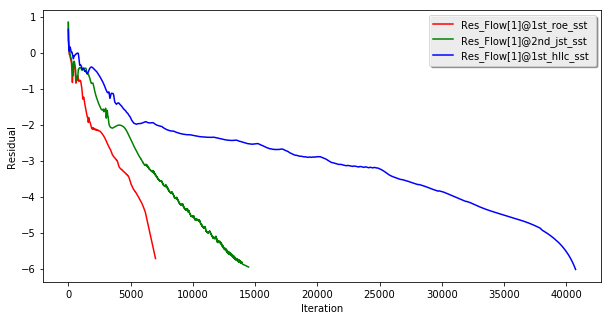

In [8]:
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(hist_first_roe_sst['Iteration'], hist_first_roe_sst['Res_Flow[1]'], 'r', label='Res_Flow[1]@1st_roe_sst')
ax.plot(hist_second_jst_sst['Iteration'], hist_second_jst_sst['Res_Flow[1]'], 'g', label='Res_Flow[1]@2nd_jst_sst')
ax.plot(hist_first_hllc_sst['Iteration'], hist_first_hllc_sst['Res_Flow[1]'], 'b', label='Res_Flow[1]@1st_hllc_sst ')
legend = ax.legend(loc='upper right', shadow=True)
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.show()

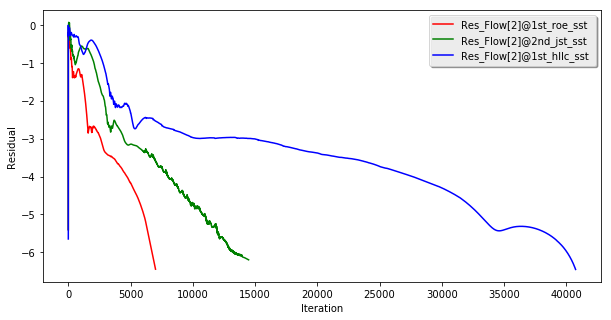

In [10]:
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(hist_first_roe_sst['Iteration'], hist_first_roe_sst['Res_Flow[2]'], 'r', label='Res_Flow[2]@1st_roe_sst')
ax.plot(hist_second_jst_sst['Iteration'], hist_second_jst_sst['Res_Flow[2]'], 'g', label='Res_Flow[2]@2nd_jst_sst')
ax.plot(hist_first_hllc_sst['Iteration'], hist_first_hllc_sst['Res_Flow[2]'], 'b', label='Res_Flow[2]@1st_hllc_sst ')
legend = ax.legend(loc='upper right', shadow=True)
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.show()